In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/home/sushil/Documents/Assingment/SVM-17/forestfires.csv')

In [3]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [13]:
data.shape

(517, 31)

In [7]:
data.corr().head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006


<AxesSubplot:xlabel='size_category', ylabel='FFMC'>

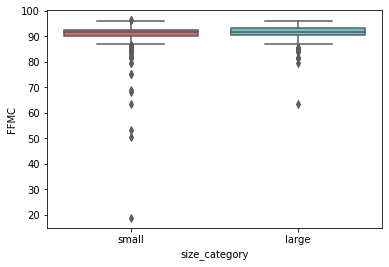

In [9]:
sns.boxplot(x = 'size_category',y = 'FFMC',data = data,palette = 'hls')

<AxesSubplot:xlabel='DMC', ylabel='size_category'>

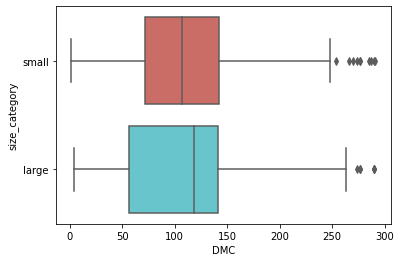

In [10]:
sns.boxplot(y = 'size_category' , x = 'DMC',data = data , palette = 'hls')

<AxesSubplot:xlabel='DC', ylabel='size_category'>

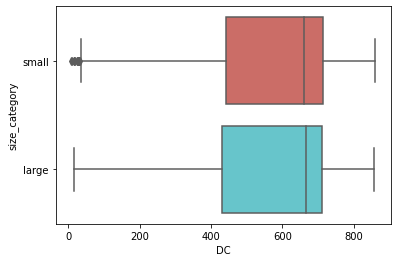

In [11]:
sns.boxplot(y = 'size_category' ,x = 'DC' , data = data,palette = 'hls')

<AxesSubplot:xlabel='ISI', ylabel='size_category'>

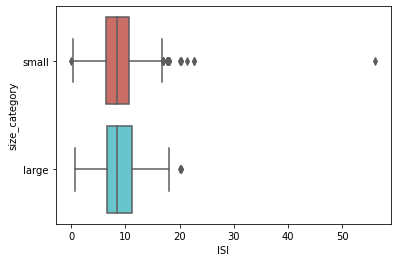

In [12]:
sns.boxplot(y = 'size_category', x = 'ISI' , data = data , palette = 'hls')

(array([378.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 139.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

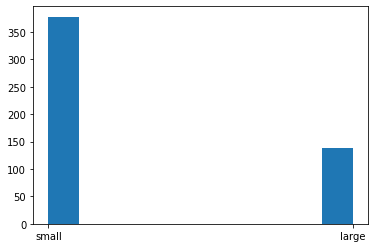

In [15]:
plt.hist(data['size_category'])

In [23]:
data['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

(array([ 63.,  63.,  49., 114., 113.,  42.,  25.,  23.,   9.,  16.]),
 array([  1.1 ,  30.12,  59.14,  88.16, 117.18, 146.2 , 175.22, 204.24,
        233.26, 262.28, 291.3 ]),
 <BarContainer object of 10 artists>)

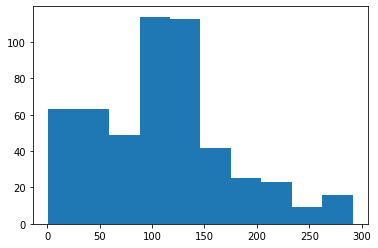

In [16]:
plt.hist(data['DMC'])

(array([ 83., 312.,  93.,  26.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.  ,  5.61, 11.22, 16.83, 22.44, 28.05, 33.66, 39.27, 44.88,
        50.49, 56.1 ]),
 <BarContainer object of 10 artists>)

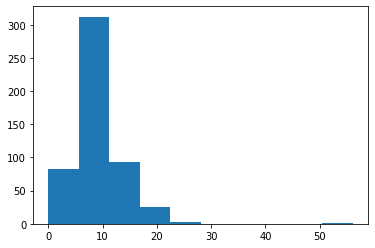

In [17]:
plt.hist(data['ISI'])

<AxesSubplot:>

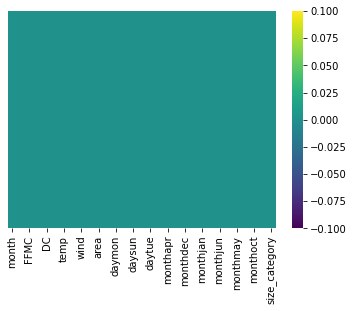

In [19]:
sns.heatmap(data.isnull(), cmap = 'viridis', yticklabels = False)

In [21]:
data.isnull().sum().head()

month    0
day      0
FFMC     0
DMC      0
DC       0
dtype: int64

<AxesSubplot:xlabel='month', ylabel='count'>

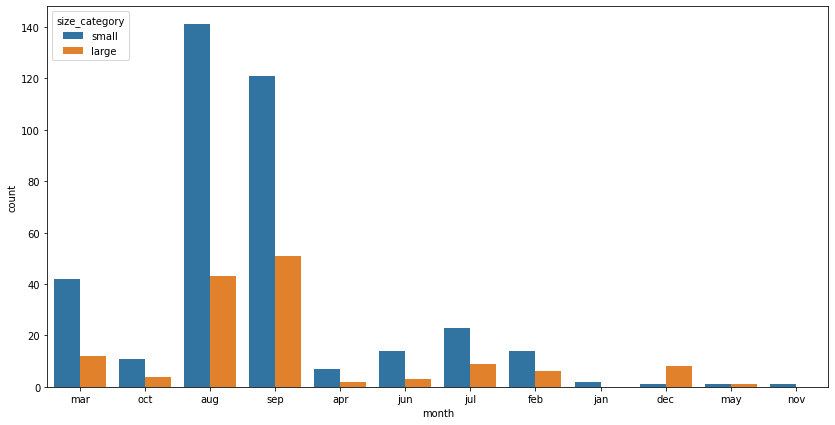

In [25]:
plt.figure(figsize = (14,7))
sns.countplot('month', hue = 'size_category', data = data)

<AxesSubplot:xlabel='day', ylabel='count'>

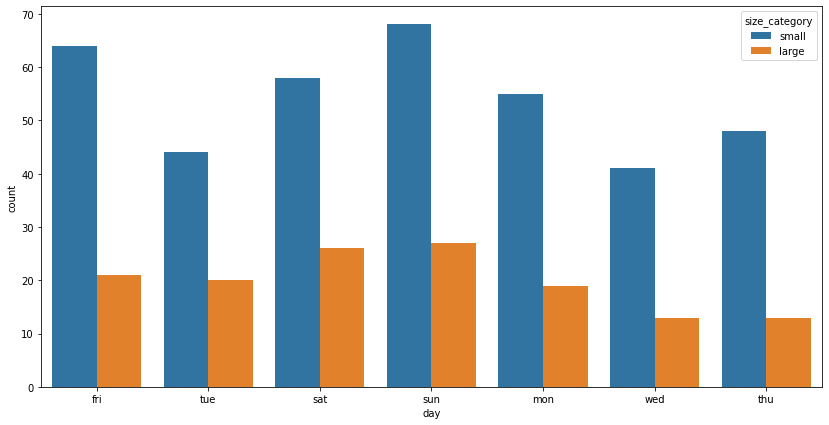

In [27]:
plt.figure(figsize = (14,7))
sns.countplot('day', hue = 'size_category', data = data)

In [29]:
data_new = data.drop(['day','month'],axis = 1)

In [30]:
data_new.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [31]:
x = data_new.drop('size_category',axis = 1)

In [32]:
x.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [33]:
y = data_new['size_category']

In [34]:
y.head()

0    small
1    small
2    small
3    small
4    small
Name: size_category, dtype: object

In [38]:
#from sklearn.linear_model import LinearRegression

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3)

In [45]:
from sklearn.svm import SVC

In [46]:
###### Using Linear kernal ########

In [48]:
model = SVC(kernel = 'linear')

In [49]:
model.fit(x_train , y_train)

SVC(kernel='linear')

In [50]:
test_pred = model.predict(x_test)

In [51]:
test_pred

array(['small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'large', 'large', 'large', 'large', 'small', 'large', 'small',
       'small', 'small', 'small', 'small', 'large', 'small', 'small',
       'small', 'small', 'small', 'large', 'small', 'small', 'small',
       'small', 'large', 'small', 'small', 'small', 'small', 'large',
       'large', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'large',
       'large', 'large', 'small', 'small', 'small', 'large', 'large',
       'small', 'small', 'large', 'small', 'large', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'large', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'large',
       'small', 'small', 'small', 'small', 'small', 'large', 'large',
       'large', 'lar

In [53]:
np.mean(test_pred == y_test)

0.9871794871794872

In [54]:
model.score(x_train,y_train)

1.0

In [55]:
####### Linear model accuracy = 98.71% ##########

In [56]:
from sklearn.metrics import classification_report , confusion_matrix

In [57]:
print(classification_report(test_pred , y_test))

              precision    recall  f1-score   support

       large       0.97      0.97      0.97        36
       small       0.99      0.99      0.99       120

    accuracy                           0.99       156
   macro avg       0.98      0.98      0.98       156
weighted avg       0.99      0.99      0.99       156



In [58]:
print(confusion_matrix(test_pred , y_test))

[[ 35   1]
 [  1 119]]


In [59]:
########## using poly kernel ##########

In [60]:
model1 = SVC(kernel = 'poly')

In [61]:
model1.fit(x_train,y_train)

SVC(kernel='poly')

In [62]:
model1.score(x_train , y_train)

0.7617728531855956

In [63]:
test1_pred = model1.predict(x_test)

In [67]:
test1_pred

array(['small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'large', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'large', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'sma

In [66]:
np.mean(test1_pred == y_test)

0.7884615384615384

In [68]:
print(classification_report(test1_pred,y_test))

              precision    recall  f1-score   support

       large       0.08      1.00      0.15         3
       small       1.00      0.78      0.88       153

    accuracy                           0.79       156
   macro avg       0.54      0.89      0.52       156
weighted avg       0.98      0.79      0.87       156



In [69]:
print(confusion_matrix(test1_pred,y_test))

[[  3   0]
 [ 33 120]]


In [70]:
########  Using poly kernel model gets underfitted #########

In [71]:
#######   Using rbf kernel ########

In [72]:
model2 = SVC(kernel = 'rbf')

In [73]:
model2.fit(x_train,y_train)

SVC()

In [75]:
test2_pred = model2.predict(x_test)

In [76]:
test2_pred

array(['small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'large', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'sma

In [77]:
np.mean(test2_pred == y_test)

0.782051282051282

In [79]:
model2.score(x_train,y_train)

0.7423822714681441

In [80]:
######## Again model2 build using poly kernel is gets underfitted ####### 

In [ ]:
########## So , the Ist model performance is best ###########